In [1]:
import tweepy
import csv #Import csv

with open('../credentials.txt', 'r') as credentials:
    credentials.readline()
    api_key = credentials.readline().rstrip()
    api_key_secret = credentials.readline().rstrip()
    credentials.readline()
    access_token = credentials.readline().rstrip()
    access_token_secret = credentials.readline().rstrip()

In [2]:
auth = tweepy.auth.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
# Open/create a file to append data to
csvFile = open('../dataset/prova.csv', 'a', encoding="UTF-8")

#Use csv writer
csvWriter = csv.writer(csvFile)

tweets = []
ratios = []

for tweet in tweepy.Cursor(api.search,
                           q = "from:FoodizShare AND -filter:retweets AND -filter:replies",
                           until='2020-08-24',
                           tweet_mode='extended').items():

    tweets.append(tweet)

    if tweet.user.followers_count == 0:
        continue

    ratio = (tweet.retweet_count) / tweet.user.followers_count
    ratios.append(ratio)

    # Write a row to the CSV file. I use UTF-8 encoding
    csvWriter.writerow([tweet.user.screen_name, tweet.created_at, tweet.full_text,tweet.retweet_count, ratio])
csvFile.close()

In [4]:
len(tweets)

6

In [5]:
date = []
retweet_count = []

for tweet in tweets:
    print(tweet.created_at, tweet.retweet_count)
    date.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    

2020-08-23 07:40:49 13
2020-08-22 08:21:52 11
2020-08-20 05:34:29 36
2020-08-19 06:32:14 20
2020-08-18 07:19:26 16
2020-08-17 07:57:21 11


In [6]:
for index, tweet in enumerate(tweets):
    print(tweet.retweet_count)

13
11
36
20
16
11


In [7]:
%matplotlib inline

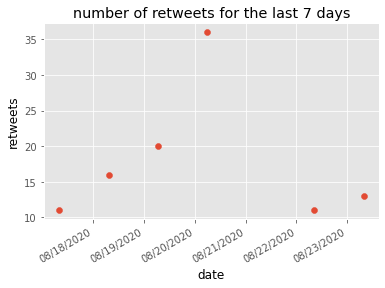

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.xlabel('date', color='black')
plt.ylabel('retweets', color='black')
plt.title('number of retweets for the last 7 days')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.scatter(date,retweet_count)
plt.gcf().autofmt_xdate()

In [9]:
import numpy
range = numpy.arange(1, len(tweets)+1, 1)

<BarContainer object of 6 artists>

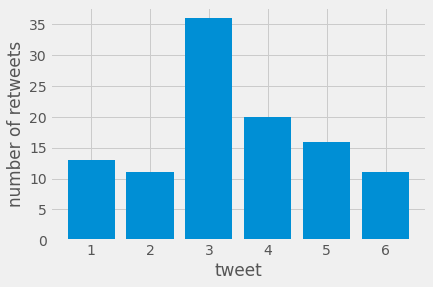

In [10]:
plt.style.use('fivethirtyeight')
plt.xlabel('tweet')
plt.ylabel('number of retweets')
plt.xticks(range)
plt.bar(range, retweet_count)

In [11]:
import pandas as pd

df = pd.read_csv("../dataset/raw_dataset.csv")
df.tail()

,screen_name,date,text,retweet_count,ratio
923,FoodizShare,2020-08-22 08:21:52,Grilled Chile Chicken Tacos #recipe @ https://...,11,0.000678
924,FoodizShare,2020-08-20 05:34:29,Quick Tandoori #Salmon w/ Walnut Yogurt Sauce ...,36,0.002218
925,FoodizShare,2020-08-19 06:32:14,Malaysian Fish Curry #recipe @ https://t.co/E...,20,0.001232
926,FoodizShare,2020-08-18 07:19:26,Oreo Mint Trifle Parfait #recipe @ https://t.c...,16,0.000986
927,FoodizShare,2020-08-17 07:57:21,Moroccan Style Beet Salad \n#recipe @ https://...,11,0.000678


In [12]:
names = df.screen_name.unique()
names

array(['CookGlobal', 'indianclaypot', 'misspickledplum', 'Living_Lou',
       'KitchenSanc2ary', 'deliciousmag', 'RecipesIdeas',
       'CookingChannel', 'Allrecipes', 'seriouseats', 'FoodizShare'],
      dtype=object)

In [13]:
for name in names:
    print(name)
    count = 0
    for index, row in df[df.screen_name == name].iterrows():
        count += 1
    print(count)

CookGlobal
158
indianclaypot
7
misspickledplum
26
Living_Lou
220
KitchenSanc2ary
148
deliciousmag
109
RecipesIdeas
61
CookingChannel
20
Allrecipes
115
seriouseats
58
FoodizShare
6
